In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#read data file of movies scraped and merged with cmu movie corpus 
df_movies = pd.read_csv('df_with_ratings.csv',sep=',')
df_movies.head()

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie genres,MBO_revenue,budget,averageRating,numVotes,Movie runtime,Profit,weighted_rating
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,"['Thriller', 'Crime Thriller', 'Horror', 'Psyc...",4.511683e+07,2.831896e+07,6.6,70075,97,1.679787e+07,6.427211
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,"['Crime Fiction', 'Mystery', 'Horror']",2.404963e+08,1.945688e+07,7.4,339095,111,2.210394e+08,7.136848
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,219579,133,3.515077e+08,6.171448
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,"['Drama', 'Indie']",4.882577e+06,1.500000e+07,6.7,45923,104,-1.011742e+07,6.429922
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,"['Thriller', 'Science Fiction', 'Adventure', '...",2.925873e+08,1.600000e+08,8.8,2321244,148,1.325873e+08,8.688890


In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3367 entries, 0 to 3366
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdbID              3367 non-null   object 
 1   Freebase movie ID   3367 non-null   object 
 2   Movie name          3367 non-null   object 
 3   Movie release date  3367 non-null   object 
 4   Year released       3367 non-null   int64  
 5   Movie genres        3367 non-null   object 
 6   MBO_revenue         3367 non-null   float64
 7   budget              3367 non-null   float64
 8   averageRating       3367 non-null   float64
 9   numVotes            3367 non-null   int64  
 10  Movie runtime       3367 non-null   int64  
 11  Profit              3367 non-null   float64
 12  weighted_rating     3367 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 342.1+ KB


In [4]:
#read the data file containing various information about characters and actors
colnames1 = ["Wikipedia movie ID","Freebase movie ID","Movie release date","character name","actor date of birth","actor gender","actor height","actor ethnicity","actor name","actor age at movie release","freebase character/actor map id","freebase character id","freebase actor id"]
df_characters=pd.read_csv('./MovieSummaries/character.metadata.tsv', sep="\t", names = colnames1)
df_characters.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,character name,actor date of birth,actor gender,actor height,actor ethnicity,actor name,actor age at movie release,freebase character/actor map id,freebase character id,freebase actor id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
df_characters = df_characters[~df_characters["freebase actor id"].isna()]
len(df_characters)

449854

In [6]:
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449854 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               449854 non-null  int64  
 1   Freebase movie ID                449854 non-null  object 
 2   Movie release date               439874 non-null  object 
 3   character name                   192465 non-null  object 
 4   actor date of birth              344524 non-null  object 
 5   actor gender                     405060 non-null  object 
 6   actor height                     154824 non-null  float64
 7   actor ethnicity                  106058 non-null  object 
 8   actor name                       449441 non-null  object 
 9   actor age at movie release       292556 non-null  float64
 10  freebase character/actor map id  449854 non-null  object 
 11  freebase character id            192475 non-null  object 
 12  fr

In [7]:
#count number of charactes per distinct movie
nb_actors = df_characters.groupby("Freebase movie ID")["freebase actor id"].apply(
    lambda x: x.count()
)

nb_actors.name = "nb actors"

#merge with the movies dataframe
df_movies = df_movies.merge(nb_actors, left_on="Freebase movie ID", right_index=True)
df_movies.head()

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie genres,MBO_revenue,budget,averageRating,numVotes,Movie runtime,Profit,weighted_rating,nb actors
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,"['Thriller', 'Crime Thriller', 'Horror', 'Psyc...",4.511683e+07,2.831896e+07,6.6,70075,97,1.679787e+07,6.427211,13
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,"['Crime Fiction', 'Mystery', 'Horror']",2.404963e+08,1.945688e+07,7.4,339095,111,2.210394e+08,7.136848,20
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,219579,133,3.515077e+08,6.171448,17
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,"['Drama', 'Indie']",4.882577e+06,1.500000e+07,6.7,45923,104,-1.011742e+07,6.429922,25
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,"['Thriller', 'Science Fiction', 'Adventure', '...",2.925873e+08,1.600000e+08,8.8,2321244,148,1.325873e+08,8.688890,15


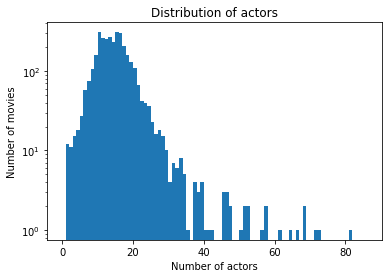

In [8]:
# plot the distribution of actors
maximum = np.max(df_movies["nb actors"])
bins = np.arange(maximum)
plt.hist(df_movies["nb actors"], bins=bins,log = True)
plt.xlabel("Number of actors")
plt.ylabel("Number of movies")
plt.title("Distribution of actors")
plt.show()

In [9]:
df_movies["nb actors"].describe()

count    3349.000000
mean       14.576291
std         6.474972
min         1.000000
25%        11.000000
50%        14.000000
75%        17.000000
max        87.000000
Name: nb actors, dtype: float64

Comment

we set the axis of the historgram to a log scale because when we group, the distribution that we obtain is heavy-tailed.

[Text(0.5, 1.0, 'Relationship between the presence of a number of actors in a movie with its box office revenue')]

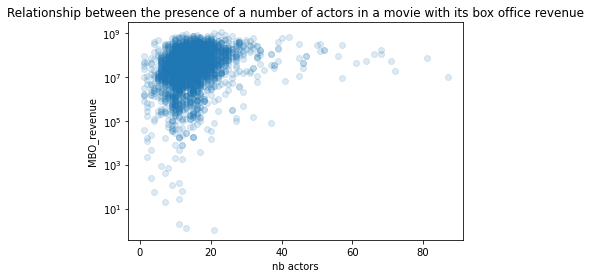

In [10]:
#scatter plot to check relationship between two variables : number of actors and the box office revenue
splot = sns.regplot(x="nb actors", y="MBO_revenue", 
                    data=df_movies,scatter_kws={'alpha':0.15}, fit_reg=False)
splot.set(yscale="log")
splot.set(title='Relationship between the presence of a number of actors in a movie with its box office revenue')

In [11]:
stats.spearmanr(df_movies["nb actors"], df_movies["MBO_revenue"])

SpearmanrResult(correlation=0.31232886285772604, pvalue=1.1090860105757853e-76)

correlation  of 0.35 which means that the relationship is weak uphill (positive).It is still significant since the p value is of 0 and do we should look closer into the relationship between the number of actors and the movie box office revenue

[Text(0.5, 1.0, 'Relationship between the presence of a number of actors in a movie with its budget')]

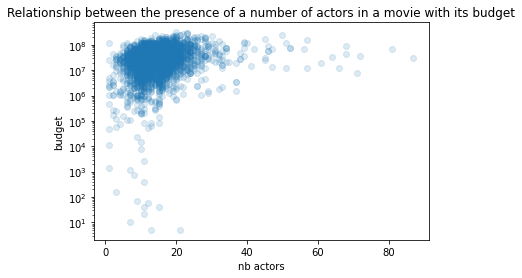

In [12]:
#scatter plot to check relationship between two variables : number of actors and the movie budget
splot = sns.regplot(x="nb actors", y="budget", 
                    data=df_movies,scatter_kws={'alpha':0.15}, fit_reg=False)
splot.set(yscale="log")
splot.set(title='Relationship between the presence of a number of actors in a movie with its budget')

In [13]:
stats.spearmanr(df_movies["nb actors"], df_movies["budget"])

SpearmanrResult(correlation=0.26341111595595645, pvalue=2.841675674746885e-54)

[Text(0.5, 1.0, 'Relationship between the presence of a number of actors in a movie with its profit')]

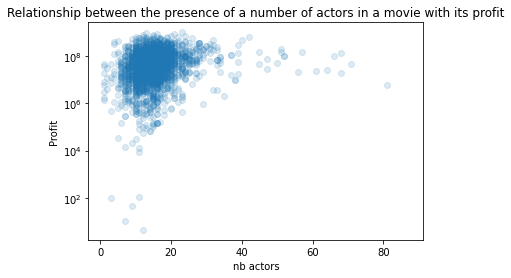

In [14]:
#scatter plot to check relationship between two variables : number of actors and the profit made by the movie
splot = sns.regplot(x="nb actors", y="Profit", 
                    data=df_movies,scatter_kws={'alpha':0.15}, fit_reg=False)
splot.set(yscale="log")
splot.set(title='Relationship between the presence of a number of actors in a movie with its profit')

In [15]:
stats.spearmanr(df_movies["nb actors"], df_movies["Profit"])

SpearmanrResult(correlation=0.21994357594519529, pvalue=5.717509826693048e-38)

In [16]:
#drop na values so that we can be able to compute correlation
df_characters = df_characters[~df_characters["actor ethnicity"].isna()]

In [17]:
#number of unique ethnicities per movie
num_ethnicity = df_characters.groupby("Freebase movie ID")["actor ethnicity"].apply(
    lambda x: x.nunique()
)

num_ethnicity.name = "diversity"


#merge with the movies data frame
df_movies = df_movies.merge(num_ethnicity, left_on="Freebase movie ID", right_index=True)
df_movies.head()



,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie genres,MBO_revenue,budget,averageRating,numVotes,Movie runtime,Profit,weighted_rating,nb actors,diversity
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,"['Thriller', 'Crime Thriller', 'Horror', 'Psyc...",4.511683e+07,2.831896e+07,6.6,70075,97,1.679787e+07,6.427211,13,4
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,"['Crime Fiction', 'Mystery', 'Horror']",2.404963e+08,1.945688e+07,7.4,339095,111,2.210394e+08,7.136848,20,5
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,219579,133,3.515077e+08,6.171448,17,8
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,"['Drama', 'Indie']",4.882577e+06,1.500000e+07,6.7,45923,104,-1.011742e+07,6.429922,25,5
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,"['Thriller', 'Science Fiction', 'Adventure', '...",2.925873e+08,1.600000e+08,8.8,2321244,148,1.325873e+08,8.688890,15,8


[Text(0.5, 1.0, 'Relationship between the presence of a number of ethnicities in a movie casting with its box office revenue')]

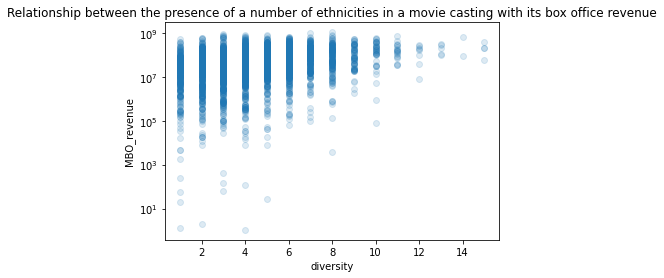

In [18]:
#scatter plot to check relationship between two variables : number of ethnicities and the movie box office revenue
splot = sns.regplot(x="diversity", y="MBO_revenue", 
                    data=df_movies,scatter_kws={'alpha':0.15}, fit_reg=False)
splot.set(yscale="log")
splot.set(title='Relationship between the presence of a number of ethnicities in a movie casting with its box office revenue')

In [19]:
stats.spearmanr(df_movies["diversity"], df_movies["MBO_revenue"])

SpearmanrResult(correlation=0.3035810503059591, pvalue=6.390145012083539e-70)

In [20]:
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106058 entries, 1 to 450666
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               106058 non-null  int64  
 1   Freebase movie ID                106058 non-null  object 
 2   Movie release date               102842 non-null  object 
 3   character name                   62858 non-null   object 
 4   actor date of birth              101736 non-null  object 
 5   actor gender                     106011 non-null  object 
 6   actor height                     71977 non-null   float64
 7   actor ethnicity                  106058 non-null  object 
 8   actor name                       106058 non-null  object 
 9   actor age at movie release       93341 non-null   float64
 10  freebase character/actor map id  106058 non-null  object 
 11  freebase character id            62858 non-null   object 
 12  fr

In [21]:
#drop nan values
df_characters = df_characters[~df_characters["actor gender"].isna()]

In [22]:
#change the type to string to be able to filter out males from females
df_characters["actor gender"] = df_characters["actor gender"].astype(str)

In [23]:
#number of females actors per movie
female_actors = df_characters[df_characters["actor gender"] == "F"]
nb_female = female_actors.groupby("Freebase movie ID")["actor gender"].count()
nb_female.name = "nb_female"
#merge with the movie dataframe
df_movies = df_movies.merge(nb_female, left_on="Freebase movie ID", right_index=True)

df_movies.head(3)

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie genres,MBO_revenue,budget,averageRating,numVotes,Movie runtime,Profit,weighted_rating,nb actors,diversity,nb_female
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,"['Thriller', 'Crime Thriller', 'Horror', 'Psyc...",4.511683e+07,2.831896e+07,6.6,70075,97,1.679787e+07,6.427211,13,4,1
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,"['Crime Fiction', 'Mystery', 'Horror']",2.404963e+08,1.945688e+07,7.4,339095,111,2.210394e+08,7.136848,20,5,4
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,219579,133,3.515077e+08,6.171448,17,8,5


In [24]:
stats.spearmanr(df_movies["Movie runtime"],df_movies["budget"])

SpearmanrResult(correlation=0.3271561491224302, pvalue=4.018853118973998e-65)

In [25]:
#number of male actors per movie
male_actors = df_characters[df_characters["actor gender"] == "M"]
nb_male= male_actors.groupby("Freebase movie ID")["actor gender"].count()
nb_male.name = "nb_male"
#merge with the movie dataframe
df_movies = df_movies.merge(nb_male, left_on="Freebase movie ID", right_index=True)

df_movies.head()

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie genres,MBO_revenue,budget,averageRating,numVotes,Movie runtime,Profit,weighted_rating,nb actors,diversity,nb_female,nb_male
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,"['Thriller', 'Crime Thriller', 'Horror', 'Psyc...",4.511683e+07,2.831896e+07,6.6,70075,97,1.679787e+07,6.427211,13,4,1,3
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,"['Crime Fiction', 'Mystery', 'Horror']",2.404963e+08,1.945688e+07,7.4,339095,111,2.210394e+08,7.136848,20,5,4,4
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,219579,133,3.515077e+08,6.171448,17,8,5,6
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,"['Drama', 'Indie']",4.882577e+06,1.500000e+07,6.7,45923,104,-1.011742e+07,6.429922,25,5,3,2
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,"['Thriller', 'Science Fiction', 'Adventure', '...",2.925873e+08,1.600000e+08,8.8,2321244,148,1.325873e+08,8.688890,15,8,2,7


[Text(0.5, 1.0, 'Relationship between the presence of a number of a number of female actors in a movie casting with its box office revenue')]

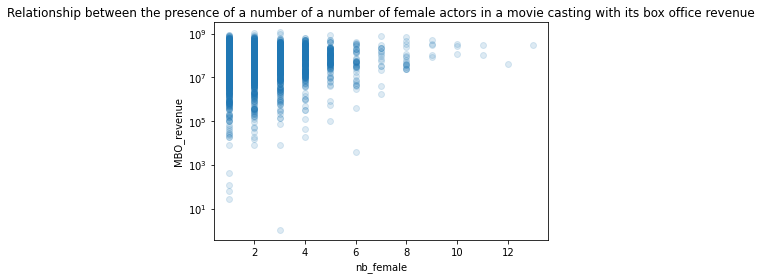

In [26]:
#scatter plot to check relationship between two variables : number of female actors and the movie box office revenue
splot = sns.regplot(x="nb_female", y="MBO_revenue", 
                    data=df_movies,scatter_kws={'alpha':0.15}, fit_reg=False)
#set the scale axis to log since it is heavy tailed.
splot.set(yscale="log")
splot.set(title='Relationship between the presence of a number of a number of female actors in a movie casting with its box office revenue')

[Text(0.5, 1.0, 'Relationship between the presence of a number of a number of male actors in a movie casting with its box office revenue')]

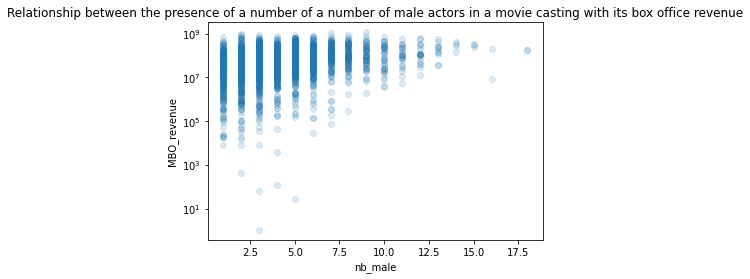

In [27]:
#scatter plot to check relationship between two variables : number of male actors and the movie box office revenue
splot = sns.regplot(x="nb_male", y="MBO_revenue", 
                    data=df_movies,scatter_kws={'alpha':0.15}, fit_reg=False)
splot.set(yscale="log")
splot.set(title='Relationship between the presence of a number of a number of male actors in a movie casting with its box office revenue')

In [28]:
stats.spearmanr(df_movies["nb_male"], df_movies["MBO_revenue"])

SpearmanrResult(correlation=0.2789370610579609, pvalue=1.2341150960535846e-44)

In [29]:
stats.spearmanr(df_movies["nb_female"], df_movies["MBO_revenue"])

SpearmanrResult(correlation=0.08405622909731249, pvalue=3.367768281167117e-05)

Text(0.5, 1.0, 'heatmap representing correlation between features')

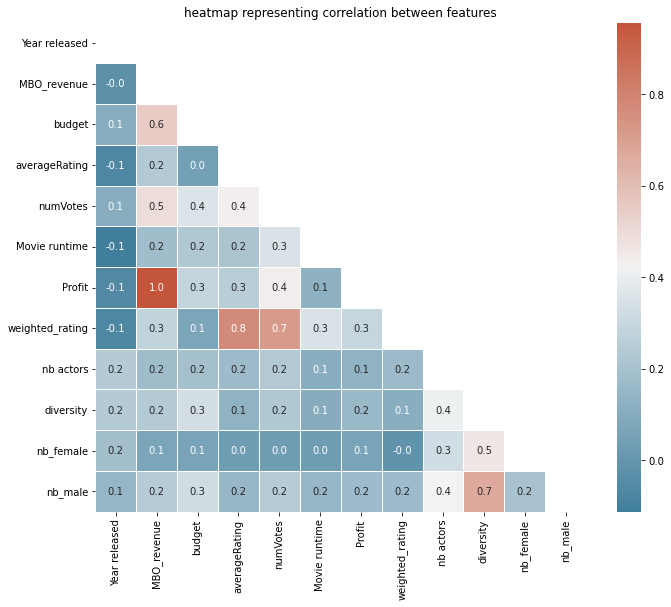

In [30]:
corr = df_movies.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, linewidths=.5, fmt= '.1f',ax=ax).set_title("heatmap representing correlation between features")

In [31]:
#create dataframe containing only female/male actors
males = df_characters[df_characters["actor gender"]=='M']
females = df_characters[df_characters["actor gender"]=='F']
#compute the percentage of male and female actors
malepercent =males.size/df_characters.size
femalepercent = females.size/df_characters.size


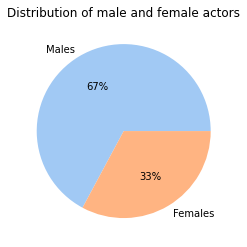

In [32]:
#define data
data = [malepercent, femalepercent]
labels = ['Males' ,'Females']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels,colors=colors, autopct='%.0f%%')
plt.title("Distribution of male and female actors")
plt.show()

** we run a query to obtain ethnicity mapping:**

 
***
    SELECT ?freebaseID ?name WHERE { 
    
    ?ethnicity p:P646 [ps:P646 ?freebaseID].  
    ?ethnicity rdfs:label ?name.               
    ?ethnicity p:P31 [ps:P31 wd:Q41710].       
    filter(lang(?name) = "en")            
}  
***

In [33]:
df_ethnicities = pd.read_csv("query_ethnicities.csv")
df_ethnicities.head()

,freebaseID,name
0,/m/0gcmzs,Rufiji people
1,/m/0gczpt,Mwera people
2,/m/0260f5_,Auaké people
3,/m/025r_4p,Khas people
4,/m/04jq32s,Nepali Indian


In [34]:
#we merge the ethnicities dataframe with the characters
res=df_characters.merge(df_ethnicities,left_on='actor ethnicity',right_on='freebaseID').drop(['freebaseID'],axis=1)
res
del res["actor ethnicity"]
res = res.rename(columns={'name': 'ethnicity'})
res.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,character name,actor date of birth,actor gender,actor height,actor name,actor age at movie release,freebase character/actor map id,freebase character id,freebase actor id,ethnicity
0,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb,Omaha people
1,8961059,/m/04j33ft,1998,NaN,1959-03-09,M,NaN,Rodney A. Grant,38.0,/m/04j33fw,NaN,/m/03ydsb,Omaha people
2,129585,/m/0y_9q,1990-10-19,Wind In His Hair,1959-03-09,M,NaN,Rodney A. Grant,31.0,/m/02vb6zz,/m/05ccmj4,/m/03ydsb,Omaha people
3,18616886,/m/04gnjpr,1997-03-16,NaN,1959-03-09,M,NaN,Rodney A. Grant,38.0,/m/0h_05wr,NaN,/m/03ydsb,Omaha people
4,244610,/m/01kff7,1999-06-30,Hudson,1959-03-09,M,NaN,Rodney A. Grant,40.0,/m/0bygtv9,/m/0bygtvd,/m/03ydsb,Omaha people


In [35]:
res['ethnicity'] = res['ethnicity'].astype(str)
res['ethnicity'].value_counts().index[0:10]

Index(['English people', 'Italian Americans', 'white Americans',
       'Scottish American', 'Irish people', 'Italians', 'Tamil', 'Punjabis',
       'Malayali', 'Scottish people'],
      dtype='object')

when checking the ethnicities of actors we can see that the top 5 ethnicities are : English people, Italian Americans, white americans, scottish american and finally irish people. This seems to be logical since we saw that english movies and more precisely movies made in the US makes most of our data and we decided to contraint the original data to this region. 
Since movies are made in the US, we should that the actors would be americans of various ethnicities and this is what we get.

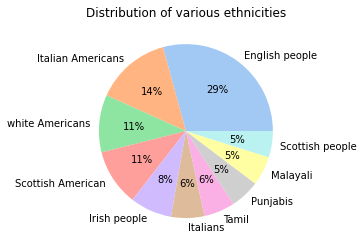

In [36]:
#define data
data = [x/len(res) for x in res['ethnicity'].value_counts()[0:10]]
labels = [x for x in res['ethnicity'].value_counts().index[0:10]]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]

#create pie chart
plt.pie(data, labels = labels,colors=colors, autopct='%.0f%%')
plt.title("Distribution of various ethnicities")
plt.show()

***We will try to measure an actor popularity using the awards he won prior to the concerned movie  
We will only consider famous awards won :  
Golden Globe Awards, British Academy Film Awards, Academy Awards, Screen Actors Guild Award and Critic's choice awards***

 
 
***
    SELECT ?actor ?actorLabel ?freebaseID ?date WHERE {

    VALUES ?best { wd:Q1011547 wd:Q732997 wd:Q19020 wd:Q268200 wd:Q7585305 wd:Q110145}   
    ?actor p:P646 [ps:P646 ?freebaseID].  
    ?actor wdt:P106 wd:Q10800557.  
    ?actor p:P166 ?awardstatement .  
    ?awardstatement ps:P166 ?award .  
    ?awardstatement pq:P585 ?date.  
    ?award wdt:P31/wdt:P279* ?best.  
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }  
    }  
    
    GROUP BY ?actor ?actorLabel ?freebaseID ?date
***

In [37]:
#read file with actors' awards
df_awards=pd.read_csv('query_top5_awards.csv')
df_awards.head()

,actor,actorLabel,freebaseID,date
0,http://www.wikidata.org/entity/Q22101817,Richard Barclay,/m/0lt47_g,1971-01-01T00:00:00Z
1,http://www.wikidata.org/entity/Q22101716,Joan Keller Stern,/m/0b_n9w5,1968-01-01T00:00:00Z
2,http://www.wikidata.org/entity/Q22076634,Lisa Thompson,/m/0b44hrk,2014-01-01T00:00:00Z
3,http://www.wikidata.org/entity/Q16207879,Emerald Fennell,/m/0h4nqkp,2021-01-01T00:00:00Z
4,http://www.wikidata.org/entity/Q7088045,Olivia Colman,/m/061d58,2018-01-01T00:00:00Z


In [38]:
#convert columns to datetime
df_awards['date'] = pd.to_datetime(df_awards['date'], format='%Y-%m-%d',errors = 'coerce').dt.date
df_characters['Movie release date'] = pd.to_datetime(df_characters['Movie release date'], format='%Y-%m-%d',errors = 'coerce')
#merge number of awards won to characters dataframe
df=df_characters.merge(df_awards,left_on='freebase actor id',right_on='freebaseID').drop(['actor','freebaseID'],axis=1)
features = list(df.columns.drop('date'))
#keep only awards won prior to movie release
df=df[df['date']<df['Movie release date']]
#count number of awards won for each actor
df=df.groupby(features,as_index=False).count()
df.rename(columns={'date':'major awards prior movie'},inplace=True)
df.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,character name,actor date of birth,actor gender,actor height,actor ethnicity,actor name,actor age at movie release,freebase character/actor map id,freebase character id,freebase actor id,actorLabel,major awards prior movie
0,3837,/m/018f8,1974-02-07,Governor WIlliam J. Lepetomane,1926-06-28,M,1.65,/m/09kr66,Mel Brooks,47.0,/m/04w0vk8,/m/04w0vkc,/m/052hl,Mel Brooks,1
1,4560,/m/01gc7,1995-05-18,William Wallace,1956-01-03,M,1.77,/m/03gskx0,Mel Gibson,39.0,/m/0jvrx4,/m/047ksls,/m/0c1pj,Mel Gibson,1
2,4726,/m/01hp5,1989-06-19,Joker,1937-04-22,M,1.77,/m/0xnvg,Jack Nicholson,52.0,/m/02wk8_m,/m/0p6vc,/m/09fb5,Jack Nicholson,6
3,4728,/m/01hq1,1992-06-16,Catwoman,1958-04-29,F,1.71,/m/065b6q,Michelle Pfeiffer,34.0,/m/031l11c,/m/027j55,/m/0gx_p,Michelle Pfeiffer,1
4,4728,/m/01hq1,1992-06-16,Max Shreck,1943-03-31,M,1.83,/m/01qhm_,Christopher Walken,49.0,/m/0jv2kp,/m/04skwd,/m/016fjj,Christopher Walken,1


In [39]:
#get actors with most awards
df_awards["actorLabel"].value_counts()[0:20]

Walt Disney             15
Maggie Smith            11
Woody Allen             10
Jack Lemmon              9
Meryl Streep             9
George Clooney           9
Betty White              8
Jack Nicholson           8
Gregory Peck             7
Shirley MacLaine         7
Alec Baldwin             7
Angela Lansbury          7
Allison Janney           7
Robin Williams           6
Jodie Foster             6
Peter O'Toole            6
Nicole Kidman            6
Joanne Woodward          6
Mickey Rooney            5
Richard Attenborough     5
Name: actorLabel, dtype: int64

In [40]:
#number of unique ethnicities per movie
num_awards = pd.DataFrame(data=df.groupby("Freebase movie ID")["major awards prior movie"].sum())

num_awards

#merge with the movies data frame
df1 = df_movies.merge(num_awards, on="Freebase movie ID")
df1.head()


,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie genres,MBO_revenue,budget,averageRating,numVotes,Movie runtime,Profit,weighted_rating,nb actors,diversity,nb_female,nb_male,major awards prior movie
0,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,"['Thriller', 'Glamorized Spy Film', 'Action', ...",5.236253e+08,1.721176e+08,6.1,219579,133,3.515077e+08,6.171448,17,8,5,6,5
1,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,"['Drama', 'Indie']",4.882577e+06,1.500000e+07,6.7,45923,104,-1.011742e+07,6.429922,25,5,3,2,2
2,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,"['Thriller', 'Science Fiction', 'Adventure', '...",2.925873e+08,1.600000e+08,8.8,2321244,148,1.325873e+08,8.688890,15,8,2,7,1
3,tt0264395,/m/04z48q,Basic,2003-03-28,2003,"['Thriller', 'Crime Fiction', 'Detective ficti...",4.977365e+07,5.925435e+07,6.4,63349,98,-9.480696e+06,6.346806,11,8,2,8,2
4,tt0282687,/m/089c83,Life or Something Like It,2002-04-26,2002,"['Romantic comedy', 'Media Satire', 'Comedy-dr...",2.045129e+07,4.848382e+07,5.7,26529,103,-2.803253e+07,6.194975,12,3,1,2,3


In [41]:
stats.spearmanr(df1["major awards prior movie"],df1["MBO_revenue"])

SpearmanrResult(correlation=0.18841934617500838, pvalue=1.6929369522479663e-10)

We can see that the relationship between the movie box office revenue and the major awards prior to the movie won by the cast is weak but we all know that the casting of a movie has some kind of weight on the success of a movie. In addition the p value is very small which means that it is still significant and so we should take a closer a look into it.

In [42]:
stats.spearmanr(df1["weighted_rating"],df1["Profit"])

SpearmanrResult(correlation=0.3008763474202, pvalue=4.268696408614328e-25)